In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from astropy import units as u
from astropy.table import Table, Column
from astropy.table import QTable
from astroquery.simbad import Simbad
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import gala.coordinates as gc
import pandas as pd

#Finding the row of the catalogue that corresponds to a certain HD #
def HDtoRow(HDnum):          
    x = np.where(hd == HDnum)
    row = int(x[0])
    return row

#Finding the distance, proper motion in RA and Dec, radial velocity, and position in RA and Dec from the star's HD #
def HDtoInfo(HDnum):                           
    distance = dist[HDtoRow(HDnum)]            
    properRA = propRA[HDtoRow(HDnum)]
    properDec = propDec[HDtoRow(HDnum)]
    radialVel = radVel[HDtoRow(HDnum)]
    RA = RA_rad[HDtoRow(HDnum)]
    Dec = Dec_rad[HDtoRow(HDnum)]
    info = [distance, properRA, properDec, radialVel, RA, Dec]
    return info

#Finding the absolute magnitude of a star from its HD
def HDtoAbsMag(HDnum):
    abs_mag = absmag[HDtoRow(HDnum)]
    return abs_mag

#Finding the B-V color index from a star's HD
def HDtoBV(HDnum):
    bv = color_index[HDtoRow(HDnum)]
    return bv

#Finding the space velocity of a star. The argument infoArray is the array of information given by the HDtoInfo function
def dataTospaceVel(infoArray):
    distance = infoArray[0]
    properMotion_RA = infoArray[1]
    properMotion_Dec = infoArray[2]
    radVel = infoArray[3]
    RA = infoArray[4]
    Dec = infoArray[5]
    # Original units of proper motion in miliseconds of arc / year. Need to change this to seconds of arc / year
    propMotionRA = properMotion_RA / 1000
    propMotionDec = properMotion_Dec / 1000
    # Convert proper motions to transverse velocities in km/s
    velTrans_RA = propMotionRA * distance * 4.740
    velTrans_Dec = propMotionDec * distance * 4.740
    # Converting velocities to new coordinate system to get dx, dy, dz in km/s
    dx = (radVel * np.cos(Dec) * np.cos(RA)) - (velTrans_RA * np.sin(RA)) - (velTrans_Dec * np.sin(Dec) * np.cos(RA))
    dy = (radVel * np.cos(Dec) * np.sin(RA)) + (velTrans_RA * np.cos(RA)) - (velTrans_Dec * np.sin(Dec) * np.sin(RA))
    dz = (radVel * np.sin(Dec)) + (velTrans_Dec * np.cos(Dec))
    # Converting velocities from km/s to parsec/year
    #dx = dx * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dy = dy * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dz = dz * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    spaceVel = [dx, dy, dz]
    return spaceVel

#Finding a star's cartesian coordinates from its RA and Dec
def radec_to_cartesian(ra_list, dec_list, vel_mag):
    #Read in individual componenets of RA and Dec
    ra_hour = ra_list[0]
    ra_min = ra_list[1]
    ra_sec = ra_list[2]
    dec_deg = dec_list[0]
    dec_arcmin = dec_list[1]
    dec_arcsec = dec_list[2]
    #Convert to degrees
    ra_deg = ra_hour * 15
    ra_arcmin = ra_min * 15
    ra_arcsec = ra_sec * 15
    ra_totdeg = ra_deg + (ra_arcmin/60) + (ra_arcsec/3600)
    dec_totdeg = dec_deg + (dec_arcmin/60) + (dec_arcsec/3600)
    #Convert to radians
    ra_rad = ra_totdeg * (np.pi/180)
    dec_rad = dec_totdeg * (np.pi/180)
    #Find cartesian velocities
    vx = vel_mag * np.cos(dec_rad) * np.cos(ra_rad)
    vy = vel_mag * np.cos(dec_rad) * np.sin(ra_rad)
    vz = vel_mag * np.sin(dec_rad)
    vel_vector = [vx, vy, vz]
    return vel_vector


Star 1: Lambda Ursa Majoris
[-2.3475979602671844, 38.864464643846226, 6.0158794441732875] 

Star 2: R Lyrae
[-2.2261871036624736, 45.17286102812994, 5.711955084322469] 

Star 3: 95 Aquarii
[-7.246084337302554, 18.103551842470473, -1.253726878627938] 

Star 4: 47 Arietis
[-5.9516613501603635, 45.91834674064229, 5.228910029405311] 

Star 5: Kappa Reticuli
[-6.9698543814287, 55.40789219849239, 6.760093054609534] 

Star 6: 20 Psc
[-4.526303458449437, 44.68559218038144, 2.8653912567313133] 



<IPython.core.display.Javascript object>


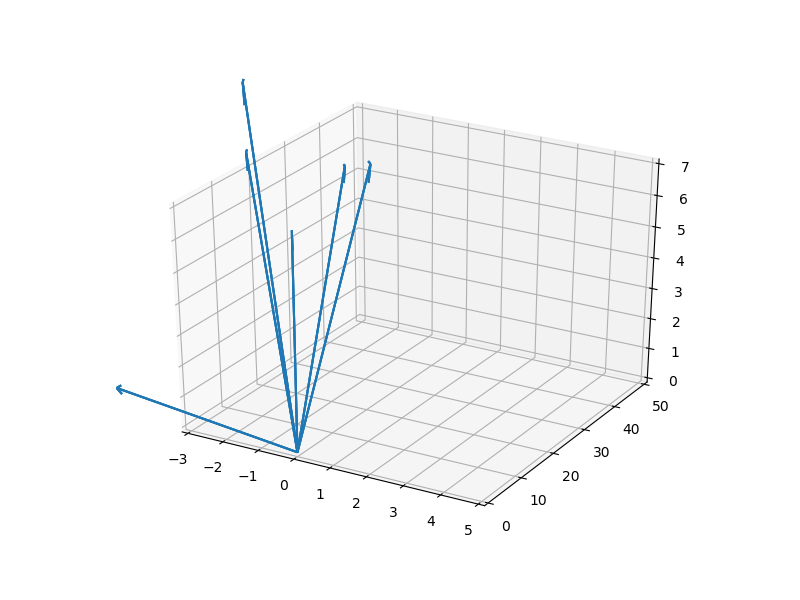

In [2]:
%matplotlib notebook

#Open catalogue data
starInfo = open("hygdata_v3.csv")

#Read in HD number, distance, proper motions, radial velocity, right ascension and declination (in radians)
dist, propRA, propDec, radVel, RA_rad, Dec_rad, xCat, yCat, zCat, vxCat, vyCat, vzCat, absmag = np.loadtxt("hygdata_v3.csv", usecols=(9, 10, 11, 12, 23, 24, 17, 18, 19, 20, 21, 22, 14), delimiter=",", skiprows = 2, unpack=True)
hd, color_index = np.genfromtxt("hygdata_v3.csv", usecols=(2, 16), delimiter=",", skip_header = 2, unpack = True)

# Testing stars in Hyades
print("Star 1: Lambda Ursa Majoris")
print(dataTospaceVel(HDtoInfo(89021)), "\n")
print("Star 2: R Lyrae")
print(dataTospaceVel(HDtoInfo(175865)), "\n")
print("Star 3: 95 Aquarii")
print(dataTospaceVel(HDtoInfo(219832)), "\n")
print("Star 4: 47 Arietis")
print(dataTospaceVel(HDtoInfo(18404)), "\n")
print("Star 5: Kappa Reticuli")
print(dataTospaceVel(HDtoInfo(22001)), "\n")
print("Star 6: 20 Psc")
print(dataTospaceVel(HDtoInfo(223252)), "\n")

test1 = dataTospaceVel(HDtoInfo(89021))
test2 = dataTospaceVel(HDtoInfo(175865))
test3 = dataTospaceVel(HDtoInfo(219832))
test4 = dataTospaceVel(HDtoInfo(18404))
test5 = dataTospaceVel(HDtoInfo(22001))
test6 = dataTospaceVel(HDtoInfo(223252))

origin = [0, 0, 0]
starList = [test1, test2, test3, test4, test5, test6]

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim([-3, 5])
ax1.set_ylim([0, 50])
ax1.set_zlim([0, 7])

for i in range(len(starList)):
    X, Y, Z = zip(origin, origin, origin)
    U, V, W = zip(starList[i], starList[i], starList[i])
    ax1.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.03)

plt.show()

In [8]:
#Reading in Gaia info
hy_gaia = pd.read_csv('Hyades Gaia Info.csv')
hy_gaia_tab = Table.from_pandas(hy_gaia)  #Make table from pandas df
hy_gaia_qtab = QTable(hy_gaia_tab, units=
                      {'ra': u.degree, 'dec': u.degree, 'parallax': u.marcsec, 'target_radial_velocity': u.km/u.s,
                      'target_pm_ra': u.marcsec/u.yr, 'target_pm_dec': u.marcsec/u.yr})   #Make QTable and give units for columns
plx_to_dist = Column(name='dist', data=hy_gaia_qtab['parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from parallax data
hy_gaia_qtab.add_column(plx_to_dist, index=5)

#Non-Gaia info
hy = pd.read_csv('Hyades Stars.csv')
hy_hd = hy[['hd']]

hyg_db = pd.read_csv('hygdata_v3.csv')
hyg_db = hyg_db[hyg_db['hd'].notna()]  #Drop stars that don't have HD numbers recorded

hy_info = hyg_db.loc[hyg_db['hd'].isin(hy_hd['hd'])]  #Get info for Hyades stars
hy_tab = Table.from_pandas(hy_info)
hy_tab.keep_columns(['hd', 'ra', 'dec', 'dist', 'pmra', 'pmdec', 'mag', 'absmag', 'ci', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'lum'])
hy_qtab = QTable(hy_tab, units={'vx': u.pc/u.yr, 'vy': u.pc/u.yr, 'vz': u.pc/u.yr, 'ra': u.degree, 'dec': u.degree})
hy_qtab['vx'] = hy_qtab['vx'].to(u.km/u.s)   #Converting velocities from pc/yr to km/s
hy_qtab['vy'] = hy_qtab['vy'].to(u.km/u.s)
hy_qtab['vz'] = hy_qtab['vz'].to(u.km/u.s)

hy_pos = hy_qtab['ra', 'dec']
hy_pos = hy_pos.to_pandas()

#Open Hyades stars data file
hyades_Stars = open("Hyades Stars.csv")

#Read in star name and HD number
h_starName, h_starHD = np.genfromtxt("Hyades Stars.csv", usecols=(0, 1), delimiter=",", skip_header = 1, unpack = True)

hyades_absmag = []
hyades_bv = []

#Make a list of the velocities of each Hyades star (array for each star's x, y, and z velocities)
for i in range(0, len(h_starHD)):
    starHD1 = h_starHD[i]
    if np.isnan(starHD1) == True:
        continue
    starAbsMag = HDtoAbsMag(starHD1)
    hyades_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    hyades_bv.append(starBV)

print(hy_gaia_qtab)

source_id         ra         ... target_radial_velocity    target_distance    
                 deg         ...         km / s                               
--------- ------------------ ... ---------------------- ----------------------
 4.98e+18  7.855036177000001 ...                   -2.0 4.2600000000000003e-07
  5.1e+17        21.45661246 ...                    6.7               4.23e-06
 1.08e+17        44.52286681 ...     27.043000000000003               3.42e-08
 4.67e+18 52.348226200000006 ...                  13.33               1.27e-06
 5.72e+17        82.95158791 ...                   -6.0               8.24e-08
 9.45e+17         99.6646052 ...                  31.98  9.009999999999999e-08
 8.72e+17 113.98046140000001 ...                 -21.61 4.5799999999999995e-07
 8.17e+17 135.15735790000002 ...                  31.39 0.00034500000000000004
 8.06e+17 154.27315190000002 ...                   18.1                3.3e-06
 5.33e+18        173.9449936 ...                   -

<IPython.core.display.Javascript object>


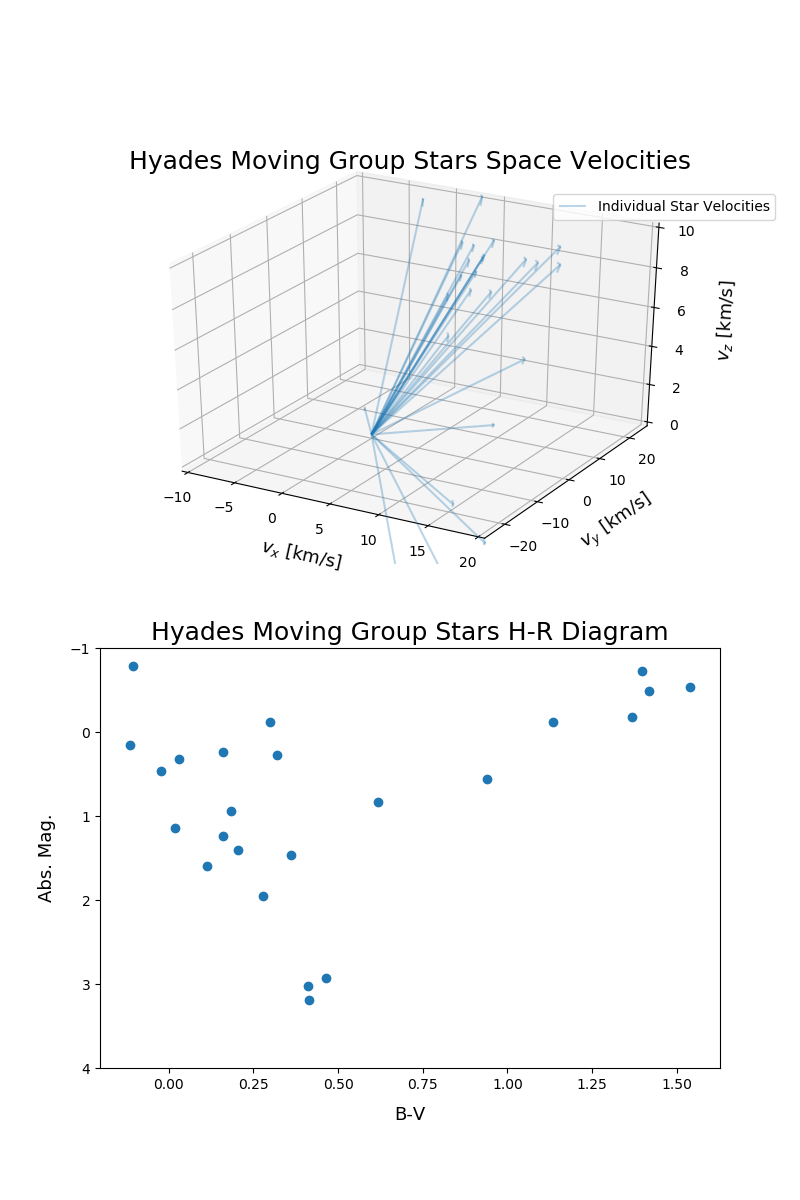

In [9]:
#Getting velocity vector for Hyades cluster
#hyadescluster_vector = radec_to_cartesian([6, 18, 5], [7, 29, 0], tot_velmag)

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-10, 20])
ax2.set_ylim([-25, 25])
ax2.set_zlim([0, 10])
ax2.set_title("Hyades Moving Group Stars Space Velocities", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, hy_qtab['vx'], hy_qtab['vy'], hy_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
#avgX = mean(U_h)
#avgY = mean(V_h)
#avgZ = mean(W_h)
#ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212)
ax3.set_ylim([4, -1])
ax3.set_title("Hyades Moving Group Stars H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(hyades_bv, hyades_absmag)
plt.show()

In [ ]:
Hey I love you

In [13]:
hy_pos_comb = hy_pos['ra'].astype(str) + str(' ') + hy_pos['dec'].astype(str)
hy_names = str('hd ') + hy_info['hd'].astype(str)
hy_names.to_csv('Hyades Names.csv')

/Users/eve.charest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


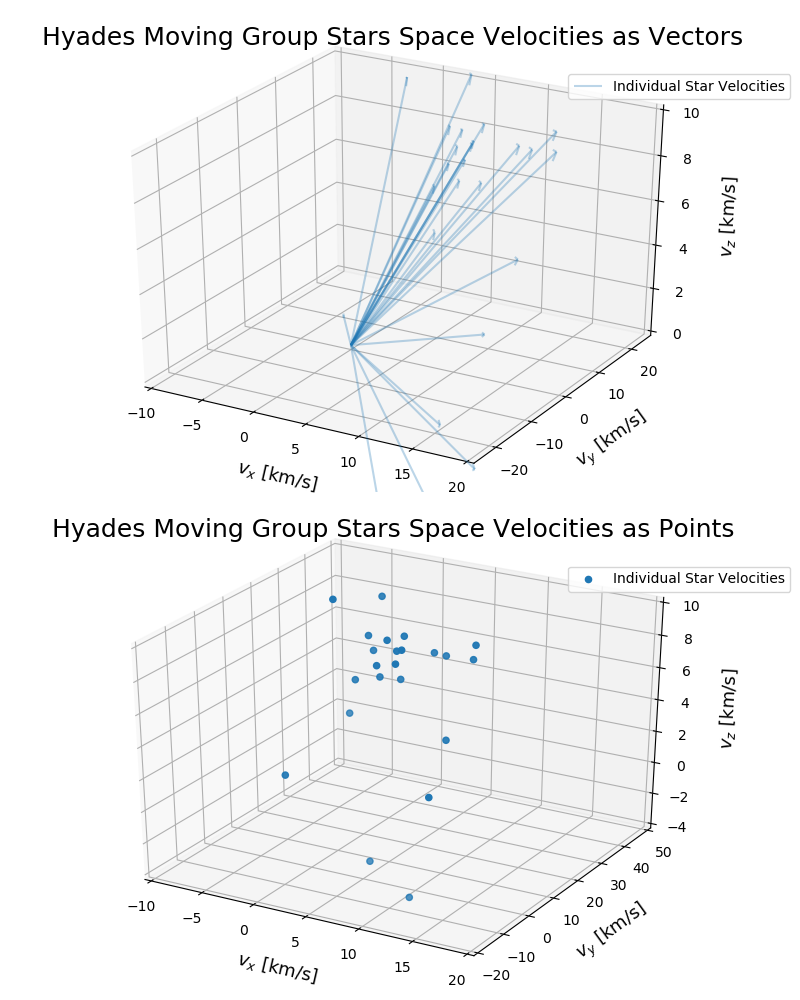

In [12]:
#Getting velocity vector for Hyades cluster
#hyadescluster_vector = radec_to_cartesian([6, 18, 5], [7, 29, 0], tot_velmag)

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,10))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-10, 20])
ax2.set_ylim([-25, 25])
ax2.set_zlim([0, 10])
ax2.set_title("Hyades Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, hy_qtab['vx'], hy_qtab['vy'], hy_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
#avgX = mean(U_h)
#avgY = mean(V_h)
#avgZ = mean(W_h)
#ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212, projection='3d')
ax3.set_title("Hyades Moving Group Stars Space Velocities as Points", fontsize = 18)
ax3.scatter(hy_qtab['vx'], hy_qtab['vy'], hy_qtab['vz'], label="Individual Star Velocities")
#ax3.scatter(hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', label="Hyades Cluster Velocity")
#ax3.scatter(avgX, avgY, avgZ, label="Avg. Moving Group Velocity")
ax3.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_xlim([-10, 20])
ax3.set_ylim([-20, 50])
ax3.set_zlim([-4, 10])

ax3.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

plt.tight_layout()

In [13]:
c = SkyCoord(ra=hy_gaia_qtab['ra'], dec=hy_gaia_qtab['dec'], radial_velocity=hy_gaia_qtab['target_radial_velocity'], 
            distance=hy_gaia_qtab['dist'], pm_ra_cosdec=hy_gaia_qtab['target_pm_ra'], pm_dec=hy_gaia_qtab['target_pm_dec'],
            frame='icrs')
pm = [hy_gaia_qtab['target_pm_ra'], hy_gaia_qtab['target_pm_dec']]
c = c.transform_to(coord.Galactocentric)  #Transform from spherical coordinates (RA, Dec, PM) to galactocentric
print(c)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8108.58646321, -1.51442136e+01, -29.42569973),
     (-8140.83312669,  2.48503538e+01,  19.56705496),
     (-8147.50995225,  9.84581472e+00,   2.97199211),
     (-8119.81430552, -1.49878503e+01,   5.14301336),
     (-8175.61575741,  7.08929987e+01,  63.71961211),
     (-8260.37972141,  1.01897174e+01,  57.16958132),
     (-8192.63008877, -1.58171676e+01,  48.89035965),
     (-8136.04627937,  4.78963166e-02,  33.17493359),
     (-8161.31197039,  2.84960366e+00,  77.60974476),
     (-8071.94653767, -1.09930415e+02,  17.72536021),
     (-8124.71948354,  5.24027577e+00,  50.78164643),
     (-8112.6429336 , -6.43902858e+00,  40.64965107),
     (-8077.17340297, -6.67707768e+01, -13.48121053),
     (-8085.50385228,  2.57116794e+01,  59.83659429),
     (-8129.03551553,  7.4

<IPython.core.display.Javascript object>


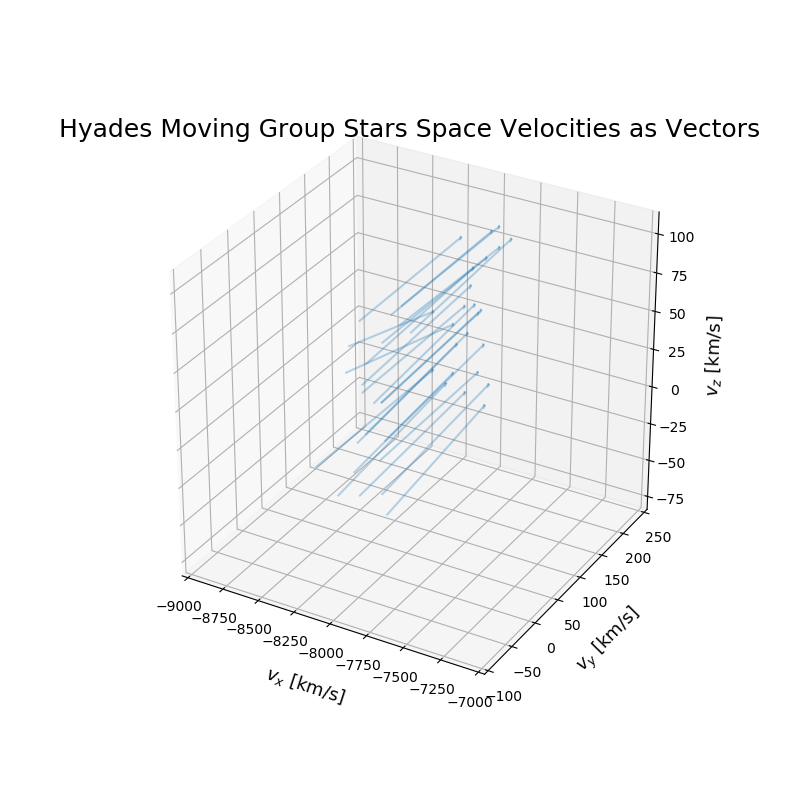

In [10]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlim([-9000, -7000])
ax2.set_ylim([-100, 250])
ax2.set_zlim([-80, 110])
ax2.set_title("Hyades Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(c.x, c.y, c.z, c.v_x, c.v_y, c.v_z, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3);
#Avg. Hyades Group vector
#avgX = mean(c2.x)
#avgY = mean(c2.y)
#avgZ = mean(c2.z)
#ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")

<IPython.core.display.Javascript object>


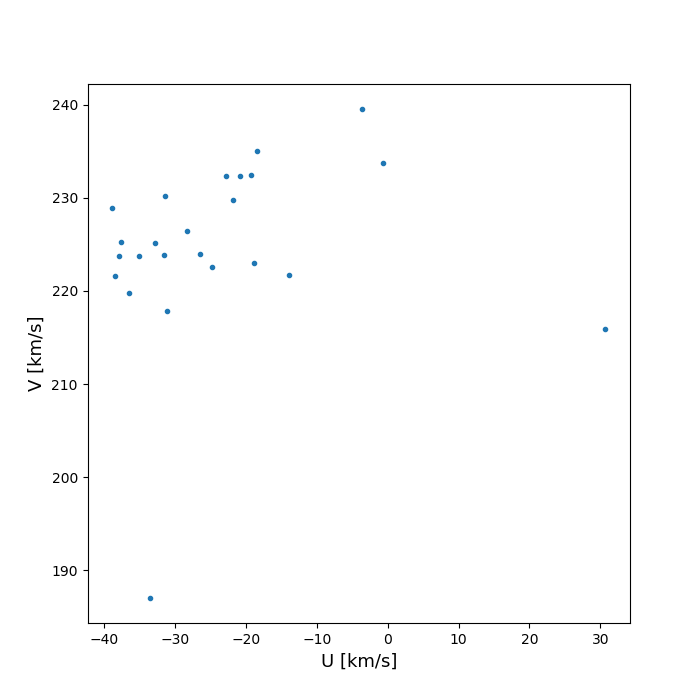

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(c.v_x, c.v_y, marker='.')
#ax.set_xlim([0, 100])
#ax.set_ylim([140, 250])
ax.set_xlabel("U [km/s]", fontsize=13)
ax.set_ylabel("V [km/s]", fontsize=13);